In [2]:
"""
（１）y = sin(x) について、x = 0 から x = π まで台形公式で積分する。
"""
import numpy as np
def integral(func, xmin, xmax, h):
    result = 0
    for x in np.arange(xmin, xmax, h):
        result += (func(x) + func(x + h)) * h / 2
    return result

integral(np.sin, 0, np.pi, 0.0001)

np.float64(1.9999999983063472)

#### **シンプソン公式（Simpson's Rule）**

シンプソン公式は、数値積分の手法の一つであり、関数の積分を近似的に計算するために使用されます。シンプソン公式は、関数を二次関数で近似し、その面積を計算することで積分を求めます。

##### **シンプソンの1/3公式**

シンプソンの1/3公式は、区間を偶数個に分け、各小区間で二次関数を用いて積分を近似します。公式は以下の通りです。

$$
\int_{a}^{b} f(x) \, dx \approx \frac{h}{3} \left[ f(x_0) + 4 f(x_1) + 2 f(x_2) + 4 f(x_3) + \cdots + 2 f(x_{n-2}) + 4 f(x_{n-1}) + f(x_n) \right]
$$


ここで、
- $ n $ は偶数
- $ h = \frac{b - a}{n} $ は区間の幅
- $ x_0 = a, x_n = b $
- $ x_i = a + i \cdot h $ （$ i = 0, 1, 2, \ldots, n $）

##### **シンプソンの3/8公式**

シンプソンの3/8公式は、区間を3の倍数に分け、各小区間で三次関数を用いて積分を近似します。公式は以下の通りです。

$$
\int_{a}^{b} f(x) \, dx \approx \frac{3h}{8} \left[ f(x_0) + 3 f(x_1) + 3 f(x_2) + 2 f(x_3) + 3 f(x_4) + 3 f(x_5) + 2 f(x_6) + \cdots + 2 f(x_{n-3}) + 3 f(x_{n-2}) + 3 f(x_{n-1}) + f(x_n) \right]
$$

ここで、
- $ n $ は偶数
- $ h = \frac{b - a}{n} $ は区間の幅
- $ x_0 = a, x_n = b $
- $ x_i = a + i \cdot h $ （$ i = 0, 1, 2, \ldots, n $）

##### **シンプソン公式の特徴**

- **高精度**：台形公式よりも高い精度で積分を近似できます。
- **簡単な実装**：関数の評価点が等間隔であるため、実装が容易です。
- **偶数区間**：区間の数は偶数でなければならないため、その点に注意が必要です。

##### **参考**
- [高校数学の美しい物語](https://manabitimes.jp/math/766)


In [3]:
"""
（２）y = e^x について、x = 0 から x = 3 までシンプソン公式で積分する。
"""
N = 10000
a = 0
b = 3
h = (b - a) / N

integral = 0
for i in range(0, N - 1, 2):
    integral += (h / 3) * (np.exp(h * i) + 4 * np.exp(h * (i + 1)) + np.exp(h * (i + 2)))

integral


np.float64(19.085536923187668)

#### **基本的な概念**

モンテカルロ法は、次の基本的なステップに基づいています。

1. **ランダムサンプリング**：問題の領域からランダムにサンプルを生成します。
2. **評価**：各サンプルの値を計算します。
3. **集計**：サンプルの平均値やその他の統計量を計算して、問題の近似解を求めます。

#### **モンテカルロ法の応用例**

##### **例1: 円周率（π）の近似**

モンテカルロ法を用いて、円周率（π）を近似することができます。具体的には、単位正方形内にランダムに点を打ち、そのうち単位円の内側に入る点の割合を利用してπを近似します。

##### **手順**

1. 単位正方形内にランダムに $ N $ 個の点を生成します。
2. 各点が単位円の内側にあるかどうかを判定します。
3. 単位円の内側にある点の数を数え、全体の点の数に対する割合を計算します。
4. その割合を基に円周率を近似します。

In [4]:
"""
（３）半径1の円の面積がπである事に注目し、モンテカルロ法で面積を求める計算を行い、円周率の近似値を求める。
"""
import random

# 乱数を生成する回数
N = 100000
# 円の中に入った点の数
count = 0

# 円の中に入った点と外れた点の座標を保持するためのリスト
inside_points = []
outside_points = []

for i in range(N):  # 0以上1以下の一様乱数 a, b を生成
    a = random.uniform(0, 1)
    b = random.uniform(0, 1)
    
    # 円の内部にあるかどうかを判定
    if a**2 + b**2 <= 1:
        count += 1
        inside_points.append((a, b))
    else:
        outside_points.append((a, b))

# 円周率の値を求める
pi = 4 * count / N
pi

3.14284

#### **楕円の周上の曲線の長さを求める方法**

楕円の周上の曲線の長さ（周長）を求めることは、数値解析や幾何学における重要な問題の一つです。楕円の周長は、解析的に正確な解を求めるのが難しく、数値積分や近似式を用いることが一般的です。

##### **楕円の基本情報**

楕円は、長半径 $ a $ と短半径 $ b $ を持ち、次の方程式で表されます。

$$
\frac{x^2}{a^2} + \frac{y^2}{b^2} = 1
$$

##### **楕円の周長の数値積分による計算**

楕円の周長 $ L $ は、次の数式で表される定積分を用いて計算できます。

$$
L = 4 \int_0^{\frac{\pi}{2}} \sqrt{a^2 \sin^2 \theta + b^2 \cos^2 \theta} \, d\theta
$$

この積分は解析的に解くことが難しいため、数値積分を用いて計算することが一般的です。

In [8]:
"""
（４）長半径 a = 6378137.0 [m] 短半径 b = 6356752.3 [m] の楕円を考え、この楕円周上の (a 0) から (0 b) までの曲線の長さを求める。
（楕円体地球上の赤道から北極点・南極点までの距離を求めることに相当）
"""
from scipy.integrate import quad

def integrand(theta, a, b):
    return np.sqrt((a * np.sin(theta)) ** 2 + (b * np.cos(theta)) ** 2)

def ellipse_arc_length(a, b):
    # 楕円の周上の曲線の長さを計算
    integral, _ = quad(integrand, 0, np.pi / 2, args=(a, b))
    return integral

# 長半径 a, 短半径 b を指定
a = 6378137.0
b = 6356752.3

# 楕円の周上の曲線の長さを計算
arc_length = ellipse_arc_length(a, b)

print(f"{arc_length}m")

10001965.718133984m


In [7]:
import numpy as np

# Ramanujanの楕円周長近似式を使用
def ellipse_arc_length_approx(a, b):
    return np.pi * (3 * (a + b) - np.sqrt((3 * a + b) * (a + 3 * b)))

# 長半径 a, 短半径 b を指定
a = 6378137.0
b = 6356752.3

# 楕円の周上の曲線の長さを計算
arc_length = ellipse_arc_length_approx(a, b)

print(f"{arc_length}m")

40007862.87253597m


#### **テイラー展開（Taylor Expansion）**

テイラー展開は、ある関数をその点の近くで多項式として近似する方法です。ある点での関数の値とその微分係数を用いて、関数を多項式で表現します。これは解析学において非常に重要なツールであり、関数の性質を理解し、数値計算や物理学、工学などの多くの分野で利用されています。

##### **テイラー級数**

ある関数 $ f(x) $ が点 $ a $ の周りで無限に微分可能であるとき、その関数は次の形式のテイラー級数で表すことができます。

$$
f(x) = f(a) + f'(a)(x - a) + \frac{f''(a)}{2!}(x - a)^2 + \frac{f'''(a)}{3!}(x - a)^3 + \cdots
$$

一般に、$ n $ 次のテイラー展開は次のように表されます。

$$
f(x) \approx f(a) + \sum_{k=1}^{n} \frac{f^{(k)}(a)}{k!}(x - a)^k
$$

ここで、
- $ f^{(k)}(a) $ は $ f(x) $ の $ k $ 階微分を $ x = a $ で評価した値
- $ k! $ は $ k $ の階乗

##### **マクローリン展開**

テイラー展開の特別な場合として、展開点 $ a = 0 $ の場合をマクローリン展開と呼びます。

$$
f(x) = f(0) + f'(0)x + \frac{f''(0)}{2!}x^2 + \frac{f'''(0)}{3!}x^3 + \cdots
$$

##### **テイラー展開の具体例**

##### **例1: $ e^x $ のテイラー展開**

指数関数 $ e^x $ のテイラー展開は以下の通りです。

$$
e^x = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \cdots
$$

##### **例2: $ \sin(x) $ のテイラー展開**

正弦関数 $ \sin(x) $ のテイラー展開は以下の通りです。

$$
\sin(x) = x - \frac{x^2}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!} + \cdots
$$

##### **例3: $ \log(x) $ のテイラー展開**

対数関数 $ \log(x) $ の $ x = 1 $ 周りのテイラー展開は以下の通りです。

$$
\log(x) = (x - 1) - \frac{(x - 1)^2}{2} + \frac{(x - 1)^3}{3} - \cdots
$$

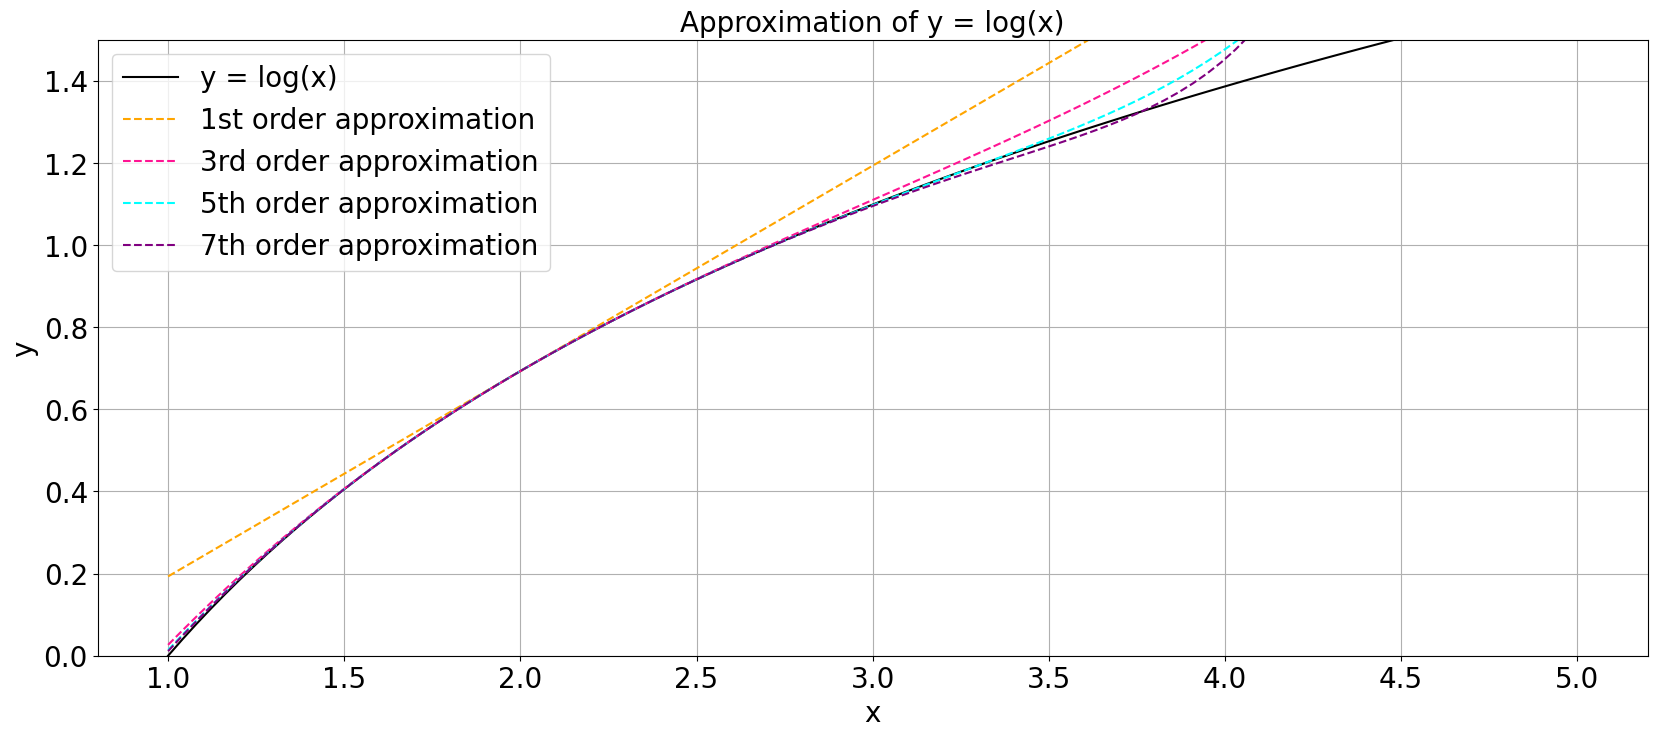

In [13]:
"""
（５）y = log(x) について、x > 0 の範囲で、x = 2.0 の周囲でテイラー展開し、
y = log(x) と 1次、3次、5次、7次の近似曲線（1次は近似直線）を図示する。
"""
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(1, 5, 100)  # x軸の範囲
y = np.log(x)

# テイラー展開による近似曲線の計算
a = 2.0  # 展開点
approx_1st = np.log(a) + (x - a) / a
term = (x - a) / a  # 1次項
approx_3rd = approx_1st - term**2 / 2 + term**3 / 3  # 2次項と3次項を追加
term *= (x - a) / a  # 更新された項
approx_5th = approx_3rd - term**2 / 4 + term**3 / 5  # 4次項と5次項を追加
term *= (x - a) / a  # 更新された項
approx_7th = approx_5th - term**2 / 6 + term**3 / 7  # 6次項と7次項を追加

plt.figure(figsize=(20, 8))
plt.plot(x, y, label='y = log(x)', color='black')
plt.plot(x, approx_1st, label='1st order approximation', linestyle='dashed', color='orange')
plt.plot(x, approx_3rd, label='3rd order approximation', linestyle='dashed', color='deeppink')
plt.plot(x, approx_5th, label='5th order approximation', linestyle='dashed', color='aqua')
plt.plot(x, approx_7th, label='7th order approximation', linestyle='dashed', color='purple')

plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.title('Approximation of y = log(x)', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.ylim(0, 1.5)
plt.legend(fontsize=20)
plt.grid(True)
plt.show()